In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from os import path
from PIL import Image

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [3]:
# Load in the dataframe
df = pd.read_excel("https://raw.githubusercontent.com/farhantk/Amazon-Fine-Food-Reviews-Wordcloud-Viz/master/Reviews.xlsx", index_col=0)

In [4]:
df = df[["Score","Text"]]
df = df.dropna()

In [5]:
df

,Score,Text
Id,,
1.0,5.0,I have bought several of the Vitality canned d...
2.0,1.0,Product arrived labeled as Jumbo Salted Peanut...
3.0,4.0,This is a confection that has been around a fe...
4.0,2.0,If you are looking for the secret ingredient i...
5.0,5.0,Great taffy at a great price. There was a wid...
...,...,...
100023.0,5.0,I stated on the batch this week and it goes we...
100024.0,5.0,"Fast shipping, always service and a really gre..."
100025.0,5.0,I've tried many noodle varieties over the year...


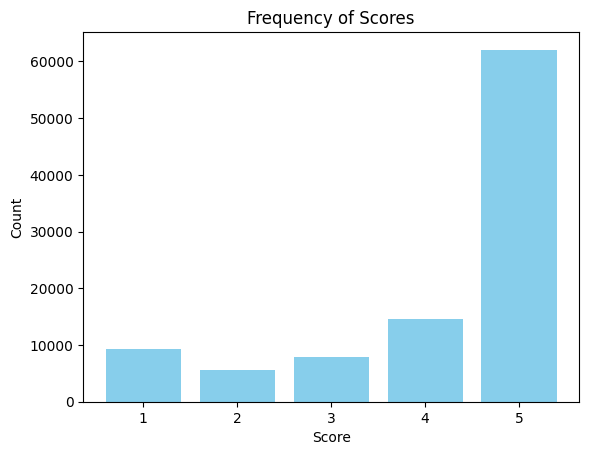

In [6]:
score_counts = df['Score'].value_counts().reset_index().rename(columns={'index': 'Score', 'Score': 'Count'})

score_counts = score_counts.sort_values(by='Score')

plt.bar(score_counts['Score'], score_counts['Count'], color='skyblue')
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Frequency of Scores')
plt.show()

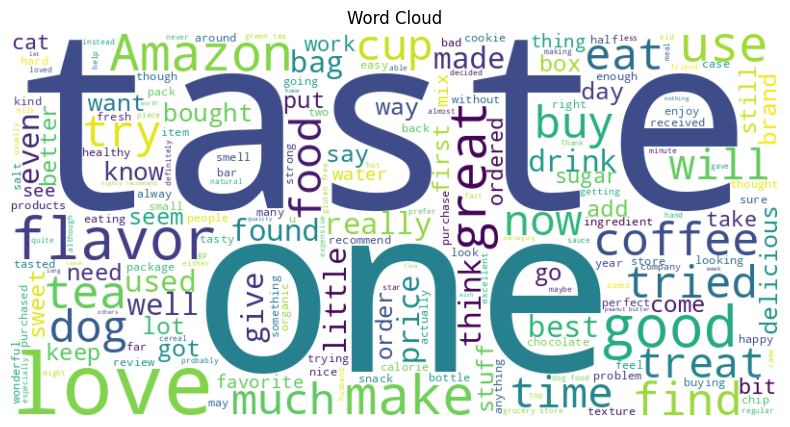

In [7]:
text_data = ' '.join(df['Text'])
stopwords = set(STOPWORDS)
stopwords.update(["br", "href", "using", "other", "said", "product" ])

wordcloud = WordCloud(width=800, height=400, stopwords=stopwords, background_color='white').generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

In [8]:
pizza_mask = np.array(Image.open("pizza.png"))

def transform_format(val):
    return np.where(val == 0, 255, val)

transformed_pizza_mask = transform_format(pizza_mask)
transformed_pizza_mask

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

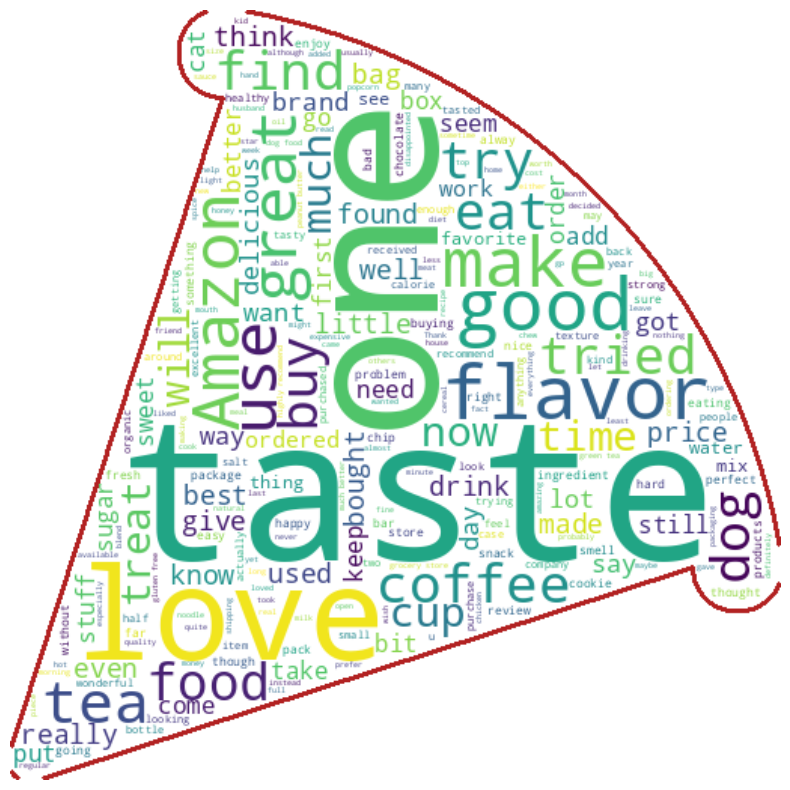

In [9]:
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_pizza_mask,
               stopwords=stopwords, contour_width=3, contour_color='firebrick')


wc.generate(text_data)


wc.to_file("wine.png")


plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

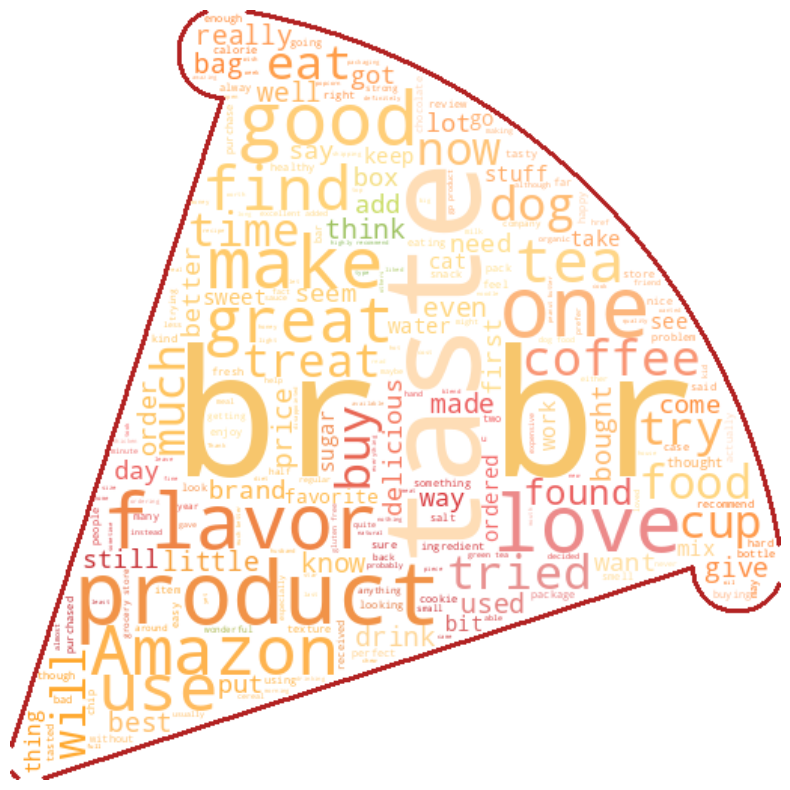

In [40]:

pizza_mask = np.array(Image.open("pizza.png"))

wc = WordCloud(background_color="white", max_words=1000, mask=transformed_pizza_mask,
               stopwords=set(STOPWORDS), contour_width=3, contour_color='firebrick')


wc.generate(text_data)
image_colors = ImageColorGenerator(transformed_pizza_mask)
wc.recolor(color_func=image_colors)
wc.to_file("wordcloud_colored.png")


plt.figure(figsize=[20, 10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()